# [Project2-team03] 서울 지역 자가용 승용차와 자전거 탄소 배출량 비교 분석

## 프로젝트 목표
- 차량의 연간 이동거리 데이터와 자전거(따릉이) 연간 이동거리 데이터를 활용
- 데이터 읽기, 정제, 시각화 학습

## 프로젝트 목차
1. 데이터 읽기: 차량 이동거리 데이터 및 자전거 이동거리 데이터 데이터프레임 구조 확인
  <br>1-1. 데이터 불러오기
  <br>1-2. 데이터 확인하기

2. 데이터 정제: 데이터 확인 후 이상치 데이터 처리
  <br>2-1. 자전거 이상치 데이터 제거

3. 데이터 시각화: 각 변수별로 추가적인 정제하고 데이터 시각화
  <br>3-1. 자전거(따릉이) 매달 이동거리 추출
  <br>3-2. 자전거(따릉이) 전체 이동거리 추출
  <br>3-3. 차량 연간 이동거리 추출
  <br>3-4. 차량 연간 이동거리와 자전거(따릉이) 전체 이동거리 막대그래프 출력

## 데이터 출처
- 차종별도로부문 온실가스 배출량: https://www.data.go.kr/data/15106288/fileData.do
- 자동차 주행거리 : https://kosis.kr/statHtml/statHtml.do?orgId=426&tblId=DT_426001_N004
- 자전거(따릉이) 이용정보: https://data.seoul.go.kr/dataList/OA-15245/F/1/datasetView.do

## 1. 데이터 읽기
필요한 패키지 설치 및 `import`한 후 `pandas`를 사용하여 데이터를 읽고 어떠한 데이터가 저장되어 있는지 확입합니다.

### 1-1. 데이터 불러오기

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

서울시에서 운영하는 자전거(따릉이) 이용정보 데이터를 불러와 bicyleDF날짜(년,월)에 저장합니다.

In [2]:
# pd.read_csv를 통하여 자전거(따릉이) 이용정보 데이터를 데이터프레임 형태로 읽어옵니다.
bicyleDF202001 = pd.read_csv("csv파일/서울특별시 공공자전거 이용정보(시간대별)_2020년/01.csv", encoding="utf-8")
bicyleDF202002 = pd.read_csv("csv파일/서울특별시 공공자전거 이용정보(시간대별)_2020년/02.csv", encoding="utf-8")
bicyleDF202003 = pd.read_csv("csv파일/서울특별시 공공자전거 이용정보(시간대별)_2020년/03.csv", encoding="utf-8")
bicyleDF202004 = pd.read_csv("csv파일/서울특별시 공공자전거 이용정보(시간대별)_2020년/04.csv", encoding="utf-8")
bicyleDF202005 = pd.read_csv("csv파일/서울특별시 공공자전거 이용정보(시간대별)_2020년/05.csv", encoding="utf-8")
bicyleDF202006 = pd.read_csv("csv파일/서울특별시 공공자전거 이용정보(시간대별)_2020년/06.csv", encoding="cp949")
bicyleDF202007 = pd.read_csv("csv파일/서울특별시 공공자전거 이용정보(시간대별)_2020년/07.csv", encoding="cp949")
bicyleDF202008 = pd.read_csv("csv파일/서울특별시 공공자전거 이용정보(시간대별)_2020년/08.csv", encoding="cp949")
bicyleDF202009 = pd.read_csv("csv파일/서울특별시 공공자전거 이용정보(시간대별)_2020년/09.csv", encoding="cp949")
bicyleDF202010 = pd.read_csv("csv파일/서울특별시 공공자전거 이용정보(시간대별)_2020년/10.csv", encoding="cp949")
bicyleDF202011 = pd.read_csv("csv파일/서울특별시 공공자전거 이용정보(시간대별)_2020년/11.csv", encoding="cp949")
bicyleDF202012 = pd.read_csv("csv파일/서울특별시 공공자전거 이용정보(시간대별)_2020년/12.csv", encoding="cp949")

In [3]:
# 자전거(따릉이) 이용정보를 상위 5개 출력합니다.
bicyleDF202001.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2020-01-01,0,1044,1044. 굽은다리역,정기권,NaN,~10대,1,33.96,0.30,1280.0,6
1,2020-01-01,0,1656,1656. 중앙하이츠 아파트 입구,정기권,NaN,~10대,1,40.15,0.39,1690.0,6
2,2020-01-01,0,1337,1337. 돈암성당 옆,정기권,NaN,~10대,1,80.88,0.50,2150.0,12
3,2020-01-01,0,1984,1984. 구로구청,정기권,NaN,~10대,1,47.36,0.43,1840.0,25
4,2020-01-01,0,2601,2601. 석촌호수 서호사거리,정기권,NaN,~10대,1,29.34,0.26,1140.0,5


In [4]:
# 자전거(따릉이) 이용정보를 상위 5개 출력합니다.
bicyleDF202002.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2020-02-01,0,1442,1442. (구)신한은행 중랑교지점,정기권,NaN,~10대,1,53.86,0.32,1360.0,6
1,2020-02-01,0,1339,1339. 삼성전자서비스 성북센터,정기권,NaN,~10대,1,10.04,0.09,390.0,3
2,2020-02-01,0,1960,1960. 화광신문사 앞,정기권,NaN,~10대,1,75.14,0.64,2750.0,24
3,2020-02-01,0,394,394. 경희궁 자이 3단지,정기권,NaN,~10대,1,28.42,0.18,780.0,3
4,2020-02-01,0,1364,1364. 성북동 치안센터 앞,정기권,NaN,~10대,1,52.97,0.41,1760.0,11


In [5]:
# 자전거(따릉이) 이용정보를 상위 5개 출력합니다.
bicyleDF202003.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2020-03-01,0,734,734. 신트리공원 입구,정기권,NaN,~10대,1,25.70,0.24,1030.0,3
1,2020-03-01,0,513,513. 뚝섬역 5번 출구 정류소 옆,정기권,NaN,~10대,1,65.74,0.77,3320.0,22
2,2020-03-01,0,1716,1716. 하나로마트 창동점,정기권,NaN,~10대,1,161.90,1.46,6290.0,32
3,2020-03-01,0,1726,1726. 삼익세라믹아파트교차로,정기권,NaN,~10대,2,69.81,0.64,2760.0,32
4,2020-03-01,0,1177,1177. 수명중?고교,정기권,NaN,~10대,1,44.21,0.47,2030.0,9


In [6]:
# 자전거(따릉이) 이용정보를 상위 5개 출력합니다.
bicyleDF202004.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2020-04-01,0,1036,1036. 고덕동 주양쇼핑,정기권,NaN,~10대,1,69.19,0.63,2730.0,14
1,2020-04-01,0,1044,1044. 굽은다리역,정기권,NaN,~10대,1,36.88,0.32,1390.0,17
2,2020-04-01,0,1447,1447. 면목역 3번출구,정기권,NaN,~10대,1,0.00,0.00,0.0,8
3,2020-04-01,0,513,513. 뚝섬역 5번 출구 정류소 옆,정기권,NaN,~10대,1,81.08,0.73,3150.0,13
4,2020-04-01,0,1650,1650. 중계근린공원내,정기권,NaN,~10대,1,28.31,0.30,1300.0,0


In [7]:
# 자전거(따릉이) 이용정보를 상위 5개 출력합니다.
bicyleDF202005.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2020-05-01,0,504,504. 신자초교입구교차로,정기권,NaN,~10대,1,40.67,0.37,1580.0,52
1,2020-05-01,0,1037,1037. 강일리버파크 6단지,정기권,NaN,~10대,1,0.00,0.00,0.0,24
2,2020-05-01,0,1038,1038. 강일 다솜 어린이 공원,정기권,NaN,~10대,1,0.00,0.00,0.0,7
3,2020-05-01,0,1258,1258. 가락미륭아파트 앞,정기권,NaN,~10대,1,38.35,0.35,1490.0,8
4,2020-05-01,0,512,512. 뚝섬역 1번 출구 옆,정기권,NaN,~10대,1,51.56,0.43,1860.0,10


In [8]:
# 자전거(따릉이) 이용정보를 상위 5개 출력합니다.
bicyleDF202006.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2020-06-01,0,733,733. 신정이펜하우스314동,정기권,NaN,~10대,1,0.00,0.00,0.0,7
1,2020-06-01,0,1044,1044. 굽은다리역,정기권,NaN,~10대,1,0.00,0.00,0.0,8
2,2020-06-01,0,2170,2170. 조원동서울본병원,정기권,NaN,~10대,1,0.00,0.00,0.0,7
3,2020-06-01,0,3517,3517. 용마사거리,정기권,NaN,~10대,1,24.14,0.27,1150.0,6
4,2020-06-01,0,2173,2173. 당곡사거리,정기권,NaN,~10대,1,0.00,0.00,0.0,8


In [9]:
# 자전거(따릉이) 이용정보를 상위 5개 출력합니다.
bicyleDF202007.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2020-07-01,0,740,740. 으뜸공원,정기권,NaN,~10대,1,13.97,0.10,440.87,5
1,2020-07-01,0,939,939. 은평구청 교차로,정기권,NaN,~10대,1,0.00,0.00,0.00,20
2,2020-07-01,0,1026,1026. 대명초교 입구 교차로,정기권,NaN,~10대,1,0.00,0.00,0.00,21
3,2020-07-01,0,1044,1044. 굽은다리역,정기권,NaN,~10대,3,52.53,0.31,1326.42,24
4,2020-07-01,0,1721,1721. 창동역 2번출구,정기권,NaN,~10대,2,62.37,0.49,2100.00,60


In [10]:
# 자전거(따릉이) 이용정보를 상위 5개 출력합니다.
bicyleDF202008.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2020-08-01,0,1152,1152. 마곡역교차로,정기권,NaN,~10대,1,20.38,0.14,620.0,2
1,2020-08-01,0,512,512. 뚝섬역 1번 출구 옆,정기권,NaN,~10대,1,42.97,0.36,1550.0,8
2,2020-08-01,0,3509,3509. 세종사이버대학교,정기권,NaN,~10대,1,0.00,0.00,0.0,61
3,2020-08-01,0,1974,1974. 신도림2차e편한세상아파트 203동 앞,정기권,NaN,~10대,1,0.00,0.00,0.0,20
4,2020-08-01,0,1163,1163. 방화동강서기동대앞,정기권,NaN,~10대,1,0.00,0.00,0.0,4


In [11]:
# 자전거(따릉이) 이용정보를 상위 5개 출력합니다.
bicyleDF202009.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2020-09-01,0,1152,1152. 마곡역교차로,정기권,NaN,~10대,1,0.00,0.00,0.0,8
1,2020-09-01,0,1532,1532. 번3동 주민센터 교차로,정기권,NaN,~10대,1,0.00,0.00,0.0,3
2,2020-09-01,0,1536,1536. 번동 두산위브 101동 옆,정기권,NaN,~10대,1,59.49,0.47,2030.0,10
3,2020-09-01,0,1650,1650. 중계근린공원내,정기권,NaN,~10대,1,0.00,0.00,0.0,55
4,2020-09-01,0,2377,2377. 수서역 5번출구 뒤,정기권,NaN,~10대,1,0.00,0.00,0.0,21


In [12]:
# 자전거(따릉이) 이용정보를 상위 5개 출력합니다.
bicyleDF202010.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2020-10-01,0,740,740. 으뜸공원,정기권,NaN,~10대,1,0.00,0.00,0.0,3
1,2020-10-01,0,1029,1029. 롯데 시네마,정기권,NaN,~10대,2,0.00,0.00,0.0,28
2,2020-10-01,0,1258,1258. 가락미륭아파트 앞,정기권,NaN,~10대,1,0.00,0.00,0.0,6
3,2020-10-01,0,1527,1527. 미아역 1번 출구 뒤,정기권,NaN,~10대,1,0.00,0.00,0.0,34
4,2020-10-01,0,1531,1531. 미아사거리 1번 출구,정기권,NaN,~10대,1,0.00,0.00,0.0,16


In [13]:
# 자전거(따릉이) 이용정보를 상위 5개 출력합니다.
bicyleDF202011.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2020-11-01,0,745,745. 강서초등학교,정기권,NaN,~10대,2,0.00,0.00,0.0,71
1,2020-11-01,0,945,945. 기자촌 사거리,정기권,NaN,~10대,1,0.00,0.00,0.0,14
2,2020-11-01,0,948,948. 디지털미디어 시티역 4번출구(DMC역),정기권,NaN,~10대,1,0.00,0.00,0.0,49
3,2020-11-01,0,1028,1028. 포레스 주상복합 빌딩,정기권,NaN,~10대,2,0.00,0.00,0.0,6
4,2020-11-01,0,1044,1044. 굽은다리역,정기권,NaN,~10대,1,0.00,0.00,0.0,9


In [14]:
# 자전거(따릉이) 이용정보를 상위 5개 출력합니다.
bicyleDF202012.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2020-12-01,0,1442,1442. (구)신한은행 중랑교지점,정기권,NaN,~10대,1,0.00,0.00,0.0,5
1,2020-12-01,0,1163,1163. 방화동강서기동대앞,정기권,NaN,~10대,1,0.00,0.00,0.0,4
2,2020-12-01,0,1663,1663. 동해문화예술관앞,정기권,NaN,~10대,1,0.00,0.00,0.0,14
3,2020-12-01,0,1682,1682. 중계종합사회복지관 교차로,정기권,NaN,~10대,1,0.00,0.00,0.0,14
4,2020-12-01,0,1171,1171. 염창동 새마을금고 건너편 (모닝글로리),정기권,NaN,~10대,1,0.00,0.00,0.0,3


In [15]:
# 자전거(따릉이) 이용정보를 데이터프레임 정보로 요약하여 출력합니다. 
bicyleDF202001.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706336 entries, 0 to 706335
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대여일자    706336 non-null  object 
 1   대여시간    706336 non-null  int64  
 2   대여소번호   706336 non-null  int64  
 3   대여소명    706336 non-null  object 
 4   대여구분코드  706336 non-null  object 
 5   성별      346011 non-null  object 
 6   연령대코드   706336 non-null  object 
 7   이용건수    706336 non-null  int64  
 8   운동량     706336 non-null  object 
 9   탄소량     706336 non-null  object 
 10  이동거리    706336 non-null  float64
 11  사용시간    706336 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 64.7+ MB


In [16]:
# 자전거(따릉이) 이용정보를 데이터프레임 정보로 요약하여 출력합니다. 
bicyleDF202002.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674297 entries, 0 to 674296
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대여일자    674297 non-null  object 
 1   대여시간    674297 non-null  int64  
 2   대여소번호   674297 non-null  int64  
 3   대여소명    674297 non-null  object 
 4   대여구분코드  674297 non-null  object 
 5   성별      341676 non-null  object 
 6   연령대코드   674297 non-null  object 
 7   이용건수    674297 non-null  int64  
 8   운동량     674297 non-null  object 
 9   탄소량     674297 non-null  object 
 10  이동거리    674297 non-null  float64
 11  사용시간    674297 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 61.7+ MB


In [17]:
# 자전거(따릉이) 이용정보를 데이터프레임 정보로 요약하여 출력합니다. 
bicyleDF202003.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1222522 entries, 0 to 1222521
Data columns (total 12 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   대여일자    1222522 non-null  object 
 1   대여시간    1222522 non-null  int64  
 2   대여소번호   1222522 non-null  int64  
 3   대여소명    1222522 non-null  object 
 4   대여구분코드  1222522 non-null  object 
 5   성별      583478 non-null   object 
 6   연령대코드   1222522 non-null  object 
 7   이용건수    1222522 non-null  int64  
 8   운동량     1222522 non-null  object 
 9   탄소량     1222522 non-null  object 
 10  이동거리    1222522 non-null  float64
 11  사용시간    1222522 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 111.9+ MB


In [18]:
# 자전거(따릉이) 이용정보를 데이터프레임 정보로 요약하여 출력합니다. 
bicyleDF202004.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659278 entries, 0 to 1659277
Data columns (total 12 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   대여일자    1659278 non-null  object 
 1   대여시간    1659278 non-null  int64  
 2   대여소번호   1659278 non-null  int64  
 3   대여소명    1659278 non-null  object 
 4   대여구분코드  1659278 non-null  object 
 5   성별      748510 non-null   object 
 6   연령대코드   1659278 non-null  object 
 7   이용건수    1659278 non-null  int64  
 8   운동량     1659278 non-null  object 
 9   탄소량     1659278 non-null  object 
 10  이동거리    1659278 non-null  float64
 11  사용시간    1659278 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 151.9+ MB


In [19]:
# 자전거(따릉이) 이용정보를 데이터프레임 정보로 요약하여 출력합니다. 
bicyleDF202005.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1855477 entries, 0 to 1855476
Data columns (total 12 columns):
 #   Column  Dtype  
---  ------  -----  
 0   대여일자    object 
 1   대여시간    int64  
 2   대여소번호   int64  
 3   대여소명    object 
 4   대여구분코드  object 
 5   성별      object 
 6   연령대코드   object 
 7   이용건수    int64  
 8   운동량     object 
 9   탄소량     object 
 10  이동거리    float64
 11  사용시간    int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 169.9+ MB


In [20]:
# 자전거(따릉이) 이용정보를 데이터프레임 정보로 요약하여 출력합니다. 
bicyleDF202006.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126548 entries, 0 to 2126547
Data columns (total 12 columns):
 #   Column  Dtype  
---  ------  -----  
 0   대여일자    object 
 1   대여시간    int64  
 2   대여소번호   int64  
 3   대여소명    object 
 4   대여구분코드  object 
 5   성별      object 
 6   연령대코드   object 
 7   이용건수    int64  
 8   운동량     object 
 9   탄소량     object 
 10  이동거리    float64
 11  사용시간    int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 194.7+ MB


In [21]:
# 자전거(따릉이) 이용정보를 데이터프레임 정보로 요약하여 출력합니다. 
bicyleDF202007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054000 entries, 0 to 2053999
Data columns (total 12 columns):
 #   Column  Dtype  
---  ------  -----  
 0   대여일자    object 
 1   대여시간    int64  
 2   대여소번호   int64  
 3   대여소명    object 
 4   대여구분코드  object 
 5   성별      object 
 6   연령대코드   object 
 7   이용건수    int64  
 8   운동량     object 
 9   탄소량     object 
 10  이동거리    float64
 11  사용시간    int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 188.0+ MB


In [22]:
# 자전거(따릉이) 이용정보를 데이터프레임 정보로 요약하여 출력합니다. 
bicyleDF202008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445994 entries, 0 to 1445993
Data columns (total 12 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   대여일자    1445994 non-null  object 
 1   대여시간    1445994 non-null  int64  
 2   대여소번호   1445994 non-null  int64  
 3   대여소명    1445994 non-null  object 
 4   대여구분코드  1445994 non-null  object 
 5   성별      735897 non-null   object 
 6   연령대코드   1445994 non-null  object 
 7   이용건수    1445994 non-null  int64  
 8   운동량     1445994 non-null  object 
 9   탄소량     1445994 non-null  object 
 10  이동거리    1445994 non-null  float64
 11  사용시간    1445994 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 132.4+ MB


In [23]:
# 자전거(따릉이) 이용정보를 데이터프레임 정보로 요약하여 출력합니다. 
bicyleDF202009.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202088 entries, 0 to 2202087
Data columns (total 12 columns):
 #   Column  Dtype  
---  ------  -----  
 0   대여일자    object 
 1   대여시간    int64  
 2   대여소번호   int64  
 3   대여소명    object 
 4   대여구분코드  object 
 5   성별      object 
 6   연령대코드   object 
 7   이용건수    int64  
 8   운동량     object 
 9   탄소량     object 
 10  이동거리    float64
 11  사용시간    int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 201.6+ MB


In [24]:
# 자전거(따릉이) 이용정보를 데이터프레임 정보로 요약하여 출력합니다. 
bicyleDF202010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332766 entries, 0 to 2332765
Data columns (total 12 columns):
 #   Column  Dtype  
---  ------  -----  
 0   대여일자    object 
 1   대여시간    int64  
 2   대여소번호   int64  
 3   대여소명    object 
 4   대여구분코드  object 
 5   성별      object 
 6   연령대코드   object 
 7   이용건수    int64  
 8   운동량     object 
 9   탄소량     object 
 10  이동거리    float64
 11  사용시간    int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 213.6+ MB


In [25]:
# 자전거(따릉이) 이용정보를 데이터프레임 정보로 요약하여 출력합니다. 
bicyleDF202011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1679828 entries, 0 to 1679827
Data columns (total 12 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   대여일자    1679828 non-null  object 
 1   대여시간    1679828 non-null  int64  
 2   대여소번호   1679828 non-null  int64  
 3   대여소명    1679828 non-null  object 
 4   대여구분코드  1679828 non-null  object 
 5   성별      926599 non-null   object 
 6   연령대코드   1679828 non-null  object 
 7   이용건수    1679828 non-null  int64  
 8   운동량     1679828 non-null  object 
 9   탄소량     1679828 non-null  object 
 10  이동거리    1679828 non-null  float64
 11  사용시간    1679828 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 153.8+ MB


In [26]:
# 자전거(따릉이) 이용정보를 데이터프레임 정보로 요약하여 출력합니다.  
bicyleDF202012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066901 entries, 0 to 1066900
Data columns (total 12 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   대여일자    1066901 non-null  object 
 1   대여시간    1066901 non-null  int64  
 2   대여소번호   1066901 non-null  int64  
 3   대여소명    1066901 non-null  object 
 4   대여구분코드  1066901 non-null  object 
 5   성별      591798 non-null   object 
 6   연령대코드   1066901 non-null  object 
 7   이용건수    1066901 non-null  int64  
 8   운동량     1066901 non-null  object 
 9   탄소량     1066901 non-null  object 
 10  이동거리    1066901 non-null  float64
 11  사용시간    1066901 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 97.7+ MB


### 1-2. 데이터 확인하기

불러온 데이터 프레임의 특정 컬럼 데이터에 null이나 0 들어 있는 데이터가 있는지 확인합니다.

In [27]:
# 데이터프레임 null 데이터 확인합니다.
bicyleDF202001.isnull().sum()

대여일자           0
대여시간           0
대여소번호          0
대여소명           0
대여구분코드         0
성별        360325
연령대코드          0
이용건수           0
운동량            0
탄소량            0
이동거리           0
사용시간           0
dtype: int64

In [28]:
# 데이터프레임 null 데이터 확인합니다.
bicyleDF202002.isnull().sum()

대여일자           0
대여시간           0
대여소번호          0
대여소명           0
대여구분코드         0
성별        332621
연령대코드          0
이용건수           0
운동량            0
탄소량            0
이동거리           0
사용시간           0
dtype: int64

In [29]:
# 데이터프레임 null 데이터 확인합니다.
bicyleDF202003.isnull().sum()

대여일자           0
대여시간           0
대여소번호          0
대여소명           0
대여구분코드         0
성별        639044
연령대코드          0
이용건수           0
운동량            0
탄소량            0
이동거리           0
사용시간           0
dtype: int64

In [30]:
# 데이터프레임 null 데이터 확인합니다.
bicyleDF202004.isnull().sum()

대여일자           0
대여시간           0
대여소번호          0
대여소명           0
대여구분코드         0
성별        910768
연령대코드          0
이용건수           0
운동량            0
탄소량            0
이동거리           0
사용시간           0
dtype: int64

In [31]:
# 데이터프레임 null 데이터 확인합니다.
bicyleDF202005.isnull().sum()

대여일자            0
대여시간            0
대여소번호           0
대여소명            0
대여구분코드          0
성별        1067109
연령대코드           0
이용건수            0
운동량             0
탄소량             0
이동거리            0
사용시간            0
dtype: int64

In [32]:
# 데이터프레임 null 데이터 확인합니다.
bicyleDF202006.isnull().sum()

대여일자            0
대여시간            0
대여소번호           0
대여소명            0
대여구분코드          0
성별        1137825
연령대코드           0
이용건수            0
운동량             0
탄소량             0
이동거리            0
사용시간            0
dtype: int64

In [33]:
# 데이터프레임 null 데이터 확인합니다.
bicyleDF202007.isnull().sum()

대여일자            0
대여시간            0
대여소번호           0
대여소명            0
대여구분코드          0
성별        1031065
연령대코드           0
이용건수            0
운동량             0
탄소량             0
이동거리            0
사용시간            0
dtype: int64

In [34]:
# 데이터프레임 null 데이터 확인합니다.
bicyleDF202008.isnull().sum()

대여일자           0
대여시간           0
대여소번호          0
대여소명           0
대여구분코드         0
성별        710097
연령대코드          0
이용건수           0
운동량            0
탄소량            0
이동거리           0
사용시간           0
dtype: int64

In [35]:
# 데이터프레임 null 데이터 확인합니다.
bicyleDF202009.isnull().sum()

대여일자            0
대여시간            0
대여소번호           0
대여소명            0
대여구분코드          0
성별        1026218
연령대코드           0
이용건수            0
운동량             0
탄소량             0
이동거리            0
사용시간            0
dtype: int64

In [36]:
# 데이터프레임 null 데이터 확인합니다.
bicyleDF202010.isnull().sum()

대여일자            0
대여시간            0
대여소번호           0
대여소명            0
대여구분코드          0
성별        1052584
연령대코드           0
이용건수            0
운동량             0
탄소량             0
이동거리            0
사용시간            0
dtype: int64

In [37]:
# 데이터프레임 null 데이터 확인합니다.
bicyleDF202011.isnull().sum()

대여일자           0
대여시간           0
대여소번호          0
대여소명           0
대여구분코드         0
성별        753229
연령대코드          0
이용건수           0
운동량            0
탄소량            0
이동거리           0
사용시간           0
dtype: int64

In [38]:
# 데이터프레임 null 데이터 확인합니다.
bicyleDF202012.isnull().sum()

대여일자           0
대여시간           0
대여소번호          0
대여소명           0
대여구분코드         0
성별        475103
연령대코드          0
이용건수           0
운동량            0
탄소량            0
이동거리           0
사용시간           0
dtype: int64

In [39]:
# bicyleDF 데이터프레임 0이 있는 데이터 확인합니다.
bicyleDF202001[(bicyleDF202001["이용건수"] == 0) | (bicyleDF202001["이동거리"] == 0) | (bicyleDF202001["사용시간"] == 0)]

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
17,2020-01-01,0,746,746. 목동2단지 상가,정기권,NaN,20대,1,0.00,0.00,0.0,9
18,2020-01-01,0,747,747. 목동3단지 상가,정기권,NaN,20대,1,0.00,0.00,0.0,11
38,2020-01-01,0,752,752. 성원2차 아파트,정기권,NaN,20대,1,0.00,0.00,0.0,3
47,2020-01-01,0,1987,1987. 개봉아이파크아파트 앞,정기권,NaN,20대,1,0.00,0.00,0.0,13
58,2020-01-01,0,117,117. 홍은사거리,정기권,NaN,20대,1,0.00,0.00,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
706283,2020-01-31,23,1503,1503. 이디야 커피 수유역점 앞,일일권,F,20대,1,0.00,0.00,0.0,27
706284,2020-01-31,23,2107,2107. 도림천 신화교,일일권,F,20대,1,0.00,0.00,0.0,24
706289,2020-01-31,23,284,284. 센트럴 푸르지오 시티 앞,일일권,F,30대,1,0.00,0.00,0.0,21
706302,2020-01-31,23,516,516. 광진메디칼 앞,일일권,M,20대,1,0.00,0.00,0.0,10


In [40]:
# bicyleDF 데이터프레임 0이 있는 데이터 확인합니다.
bicyleDF202002[(bicyleDF202002["이용건수"] == 0) | (bicyleDF202002["이동거리"] == 0) | (bicyleDF202002["사용시간"] == 0)]

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
7,2020-02-01,0,290,290. 당산동 SK V1 빌딩,정기권,NaN,~10대,1,0.00,0.00,0.0,93
9,2020-02-01,0,2701,2701. 마곡나루역 5번출구 뒤편,정기권,NaN,~10대,1,0.00,0.00,0.0,19
14,2020-02-01,0,1515,1515. 송천동 주민센터,정기권,NaN,~10대,1,0.00,0.00,0.0,7
17,2020-02-01,0,2255,2255.시민의숲역 1번출구 옆,정기권,NaN,~10대,1,\N,\N,0.0,55
21,2020-02-01,0,947,947. 연신내 선일하이츠빌 정류소,정기권,NaN,20대,1,0.00,0.00,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
674172,2020-02-29,23,907,907. CJ 드림시티,일일권,F,~10대,1,0.00,0.00,0.0,82
674185,2020-02-29,23,2412,2412. 일원1동 주민센터,일일권,F,20대,1,0.00,0.00,0.0,34
674200,2020-02-29,23,2007,2007. 유한양행앞,일일권,F,20대,1,0.00,0.00,0.0,32
674243,2020-02-29,23,2183,2183. 동방1교,일일권,M,20대,1,0.00,0.00,0.0,54


In [41]:
# bicyleDF 데이터프레임 0이 있는 데이터 확인합니다.
bicyleDF202003[(bicyleDF202003["이용건수"] == 0) | (bicyleDF202003["이동거리"] == 0) | (bicyleDF202003["사용시간"] == 0)]

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
6,2020-03-01,0,342,342. 대학로 마로니에공원,정기권,NaN,~10대,1,0.00,0.00,0.0,0
15,2020-03-01,0,230,230. 영등포구청역 1번출구,정기권,NaN,~10대,1,0.00,0.00,0.0,7
49,2020-03-01,0,3100,3100. 북성초교,정기권,NaN,20대,1,0.00,0.00,0.0,8
59,2020-03-01,0,651,651. 우리은행청량리지점앞,정기권,NaN,20대,1,0.00,0.00,0.0,12
62,2020-03-01,0,277,277. 영등포뉴타운지하상가 2번게이트,정기권,NaN,20대,1,0.00,0.00,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
1222493,2020-03-31,23,1703,1703. 도봉산광역환승센터앞,일일권,M,30대,1,0.00,0.00,0.0,7
1222501,2020-03-31,23,1056,1056. 강일리버파크 7~11단지,일일권,M,50대,1,0.00,0.00,0.0,56
1222506,2020-03-31,23,628,628. 휘봉고등학교 앞,단체권,NaN,~10대,1,0.00,0.00,0.0,71
1222514,2020-03-31,23,1706,1706. 기업은행 앞,단체권,NaN,20대,1,0.00,0.00,0.0,57


In [42]:
# bicyleDF 데이터프레임 0이 있는 데이터 확인합니다.
bicyleDF202004[(bicyleDF202004["이용건수"] == 0) | (bicyleDF202004["이동거리"] == 0) | (bicyleDF202004["사용시간"] == 0)]

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
2,2020-04-01,0,1447,1447. 면목역 3번출구,정기권,NaN,~10대,1,0.00,0.00,0.0,8
4,2020-04-01,0,1650,1650. 중계근린공원내,정기권,NaN,~10대,1,28.31,0.30,1300.0,0
14,2020-04-01,0,1279,1279. 마천금호어울림 1차아파트 건너편,정기권,NaN,~10대,1,0.00,0.00,0.0,17
19,2020-04-01,0,525,525. 한양대병원사거리,정기권,NaN,~10대,1,0.00,0.00,0.0,29
20,2020-04-01,0,609,609. 제기2교,정기권,NaN,~10대,1,0.00,0.00,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1659264,2020-04-30,23,283,283. 아크로타워 스퀘어(영등포시장),단체권,NaN,30대,2,0.00,0.00,0.0,129
1659265,2020-04-30,23,735,735. 영도초등학교,단체권,NaN,40대,2,0.00,0.00,0.0,124
1659267,2020-04-30,23,703,703. 오목교역 7번출구 앞,단체권,NaN,40대,2,0.00,0.00,0.0,98
1659269,2020-04-30,23,147,147. 마포역 4번출구 뒤,단체권,M,20대,1,0.00,0.00,0.0,12


In [43]:
# bicyleDF 데이터프레임 0이 있는 데이터 확인합니다.
bicyleDF202005[(bicyleDF202005["이용건수"] == 0) | (bicyleDF202005["이동거리"] == 0) | (bicyleDF202005["사용시간"] == 0)]

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
1,2020-05-01,0,1037,1037. 강일리버파크 6단지,정기권,NaN,~10대,1,0.00,0.00,0.0,24
2,2020-05-01,0,1038,1038. 강일 다솜 어린이 공원,정기권,NaN,~10대,1,0.00,0.00,0.0,7
5,2020-05-01,0,1447,1447. 면목역 3번출구,정기권,NaN,~10대,1,0.00,0.00,0.0,8
7,2020-05-01,0,3511,3511. 응봉역 1번출구,정기권,NaN,~10대,1,0.00,0.00,0.0,15
8,2020-05-01,0,1339,1339. 삼성전자서비스 성북센터,정기권,NaN,~10대,1,0.00,0.00,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1855467,2020-05-31,23,221,221. 여의도초교 앞,일일권,M,20대,1,0.00,0.00,0.0,15
1855468,2020-05-31,23,2024,2024. 상도역 1번출구,일일권,M,20대,1,0.00,0.00,0.0,85
1855474,2020-05-31,23,2329,2329. 르네상스호텔사거리 역삼지하보도 2번출구,일일권,M,30대,1,0.00,0.00,0.0,20
1855475,2020-05-31,23,1450,1450. 화랑대역 7번출구,일일권,M,40대,1,0.00,0.00,0.0,5


In [44]:
# bicyleDF 데이터프레임 0이 있는 데이터 확인합니다.
bicyleDF202006[(bicyleDF202006["이용건수"] == 0) | (bicyleDF202006["이동거리"] == 0) | (bicyleDF202006["사용시간"] == 0)]

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2020-06-01,0,733,733. 신정이펜하우스314동,정기권,NaN,~10대,1,0.00,0.00,0.0,7
1,2020-06-01,0,1044,1044. 굽은다리역,정기권,NaN,~10대,1,0.00,0.00,0.0,8
2,2020-06-01,0,2170,2170. 조원동서울본병원,정기권,NaN,~10대,1,0.00,0.00,0.0,7
4,2020-06-01,0,2173,2173. 당곡사거리,정기권,NaN,~10대,1,0.00,0.00,0.0,8
5,2020-06-01,0,1665,1665. 양지근린공원앞,정기권,NaN,~10대,1,0.00,0.00,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...
2126535,2020-06-30,23,1149,1149. 신방화역환승주차장,일일권,M,30대,1,\N,\N,0.0,6
2126538,2020-06-30,23,3211,3211.신길 래미안 프레비뉴,일일권,M,40대,1,0.00,0.00,0.0,5
2126540,2020-06-30,23,1332,1332. 석계역 5번출구 건너편,일일권,M,40대,1,0.00,0.00,0.0,23
2126544,2020-06-30,23,1456,1456. 상아빌딩(우림시장 교차로),단체권,NaN,~10대,1,0.00,0.00,0.0,19


In [45]:
# bicyleDF 데이터프레임 0이 있는 데이터 확인합니다.
bicyleDF202007[(bicyleDF202007["이용건수"] == 0) | (bicyleDF202007["이동거리"] == 0) | (bicyleDF202007["사용시간"] == 0)]

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
1,2020-07-01,0,939,939. 은평구청 교차로,정기권,NaN,~10대,1,0.00,0.00,0.0,20
2,2020-07-01,0,1026,1026. 대명초교 입구 교차로,정기권,NaN,~10대,1,0.00,0.00,0.0,21
5,2020-07-01,0,2060,2060. 남성역3번출구 뒤,정기권,NaN,~10대,1,0.00,0.00,0.0,2
7,2020-07-01,0,1983,1983. 구로동롯데아파트,정기권,NaN,~10대,1,0.00,0.00,0.0,6
9,2020-07-01,0,1671,1671. 인덕대학교,정기권,NaN,~10대,1,0.00,0.00,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
2053992,2020-07-31,23,1141,1141. 곰달래 문화복지센터 1-1,단체권,NaN,20대,2,0.00,0.00,0.0,30
2053993,2020-07-31,23,2122,2122. 낙성대로 입구,단체권,NaN,20대,2,0.00,0.00,0.0,26
2053994,2020-07-31,23,502,502. 뚝섬유원지역 1번출구 앞,단체권,NaN,20대,2,0.00,0.00,0.0,183
2053995,2020-07-31,23,1985,1985. 구로도서관,단체권,NaN,30대,2,0.00,0.00,0.0,120


In [46]:
# bicyleDF 데이터프레임 0이 있는 데이터 확인합니다.
bicyleDF202008[(bicyleDF202008["이용건수"] == 0) | (bicyleDF202008["이동거리"] == 0) | (bicyleDF202008["사용시간"] == 0)]

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
2,2020-08-01,0,3509,3509. 세종사이버대학교,정기권,NaN,~10대,1,0.00,0.00,0.0,61
3,2020-08-01,0,1974,1974. 신도림2차e편한세상아파트 203동 앞,정기권,NaN,~10대,1,0.00,0.00,0.0,20
4,2020-08-01,0,1163,1163. 방화동강서기동대앞,정기권,NaN,~10대,1,0.00,0.00,0.0,4
5,2020-08-01,0,1665,1665. 양지근린공원앞,정기권,NaN,~10대,1,0.00,0.00,0.0,13
6,2020-08-01,0,1670,1670. 노원경찰서교차로,정기권,NaN,~10대,1,0.00,0.00,0.0,29
...,...,...,...,...,...,...,...,...,...,...,...,...
1445986,2020-08-31,23,263,263. 근로자회관 사거리,단체권,F,~10대,2,0.00,0.00,0.0,242
1445987,2020-08-31,23,1113,1113. 서남환경공원 버스정류장,단체권,F,20대,1,0.00,0.00,0.0,106
1445988,2020-08-31,23,1351,1351. 안암2교 옆,단체권,F,30대,1,0.00,0.00,0.0,35
1445989,2020-08-31,23,207,207. 여의나루역 1번출구 앞,단체권,F,30대,2,0.00,0.00,0.0,41


In [47]:
# bicyleDF 데이터프레임 0이 있는 데이터 확인합니다.
bicyleDF202009[(bicyleDF202009["이용건수"] == 0) | (bicyleDF202009["이동거리"] == 0) | (bicyleDF202009["사용시간"] == 0)]

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2020-09-01,0,1152,1152. 마곡역교차로,정기권,NaN,~10대,1,0.00,0.00,0.0,8
1,2020-09-01,0,1532,1532. 번3동 주민센터 교차로,정기권,NaN,~10대,1,0.00,0.00,0.0,3
3,2020-09-01,0,1650,1650. 중계근린공원내,정기권,NaN,~10대,1,0.00,0.00,0.0,55
4,2020-09-01,0,2377,2377. 수서역 5번출구 뒤,정기권,NaN,~10대,1,0.00,0.00,0.0,21
6,2020-09-01,0,1668,1668. 중계역 6번출구,정기권,NaN,~10대,1,0.00,0.00,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
2202082,2020-09-30,23,1452,1452. 겸재교 진입부,단체권,F,20대,2,0.00,0.00,0.0,41
2202083,2020-09-30,23,1742,1742. 북한산 코오롱 하늘채,단체권,F,30대,2,0.00,0.00,0.0,151
2202084,2020-09-30,23,1050,1050. 둔촌역 3번 출입구,단체권,M,~10대,2,0.00,0.00,0.0,43
2202085,2020-09-30,23,170,170. 가재울 뉴타운 주유소 옆,단체권,M,~10대,3,0.00,0.00,0.0,142


In [48]:
# bicyleDF 데이터프레임 0이 있는 데이터 확인합니다.
bicyleDF202010[(bicyleDF202010["이용건수"] == 0) | (bicyleDF202010["이동거리"] == 0) | (bicyleDF202010["사용시간"] == 0)]

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2020-10-01,0,740,740. 으뜸공원,정기권,NaN,~10대,1,0.00,0.00,0.0,3
1,2020-10-01,0,1029,1029. 롯데 시네마,정기권,NaN,~10대,2,0.00,0.00,0.0,28
2,2020-10-01,0,1258,1258. 가락미륭아파트 앞,정기권,NaN,~10대,1,0.00,0.00,0.0,6
3,2020-10-01,0,1527,1527. 미아역 1번 출구 뒤,정기권,NaN,~10대,1,0.00,0.00,0.0,34
4,2020-10-01,0,1531,1531. 미아사거리 1번 출구,정기권,NaN,~10대,1,0.00,0.00,0.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...
2332761,2020-10-31,23,2611,2611. 송파지역자활센터 뒤,단체권,M,~10대,3,0.00,0.00,0.0,188
2332762,2020-10-31,23,152,152. 마포구민체육센터 앞,단체권,M,~10대,9,0.00,0.00,0.0,387
2332763,2020-10-31,23,418,418. 월드컵경기장역 3번출구 옆,단체권,M,~10대,2,0.00,0.00,0.0,81
2332764,2020-10-31,23,152,152. 마포구민체육센터 앞,단체권,M,20대,2,0.00,0.00,0.0,108


In [49]:
# bicyleDF 데이터프레임 0이 있는 데이터 확인합니다.
bicyleDF202011[(bicyleDF202011["이용건수"] == 0) | (bicyleDF202011["이동거리"] == 0) | (bicyleDF202011["사용시간"] == 0)]

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2020-11-01,0,745,745. 강서초등학교,정기권,NaN,~10대,2,0.00,0.00,0.0,71
1,2020-11-01,0,945,945. 기자촌 사거리,정기권,NaN,~10대,1,0.00,0.00,0.0,14
2,2020-11-01,0,948,948. 디지털미디어 시티역 4번출구(DMC역),정기권,NaN,~10대,1,0.00,0.00,0.0,49
3,2020-11-01,0,1028,1028. 포레스 주상복합 빌딩,정기권,NaN,~10대,2,0.00,0.00,0.0,6
4,2020-11-01,0,1044,1044. 굽은다리역,정기권,NaN,~10대,1,0.00,0.00,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...
1679822,2020-11-30,23,2109,2109. 은천로입구 가로공원,일일권,M,30대,1,0.00,0.00,0.0,35
1679823,2020-11-30,23,776,776.목마공원,일일권,M,40대,1,0.00,0.00,0.0,8
1679825,2020-11-30,23,515,515. 광양중학교 앞,단체권,M,~10대,2,0.00,0.00,0.0,88
1679826,2020-11-30,23,2107,2107. 도림천 신화교,단체권,M,20대,1,0.00,0.00,0.0,28


In [50]:
# bicyleDF 데이터프레임 0이 있는 데이터 확인합니다.
bicyleDF202012[(bicyleDF202012["이용건수"] == 0) | (bicyleDF202012["이동거리"] == 0) | (bicyleDF202012["사용시간"] == 0)]

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2020-12-01,0,1442,1442. (구)신한은행 중랑교지점,정기권,NaN,~10대,1,0.00,0.00,0.0,5
1,2020-12-01,0,1163,1163. 방화동강서기동대앞,정기권,NaN,~10대,1,0.00,0.00,0.0,4
2,2020-12-01,0,1663,1663. 동해문화예술관앞,정기권,NaN,~10대,1,0.00,0.00,0.0,14
3,2020-12-01,0,1682,1682. 중계종합사회복지관 교차로,정기권,NaN,~10대,1,0.00,0.00,0.0,14
4,2020-12-01,0,1171,1171. 염창동 새마을금고 건너편 (모닝글로리),정기권,NaN,~10대,1,0.00,0.00,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1066889,2020-12-31,23,352,352. 중앙고입구 삼거리,일일권,M,20대,1,0.00,0.00,0.0,28
1066893,2020-12-31,23,177,177. 북가좌 초등학교,일일권,M,20대,1,0.00,0.00,0.0,9
1066895,2020-12-31,23,3204,3204.도림고가도로 밑,일일권,M,30대,1,0.00,0.00,0.0,37
1066896,2020-12-31,23,3121,3121.가좌삼거리,일일권,M,30대,1,0.00,0.00,0.0,13


## 2. 데이터 정제

데이터를 확인해 보니 2020년 1월부터 2020년 12월까지 수집된 데이터의 문제점을 확인한 것을 알 수 있습니다.
여기서 1년간 수집된 데이터를 기준으로 매달 이동하는 거리와 이동거리의 합을 확인하고자 합니다.

### 2-1. 2020년 12개월 동안 이동한 거리 추출

수집된 데이터 중 제대로 된 데이터만 추출하고 0이 있는 데이터는 제거합니다.

In [51]:
# 이용건수, 이동거리, 이용시간이 0이상인 데이터만을 가져옵니다.
bicyleDF202001 = bicyleDF202001[(bicyleDF202001["이용건수"] > 0) & (bicyleDF202001["이동거리"] > 0) &(bicyleDF202001["사용시간"] > 0)]
bicyleDF202001

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2020-01-01,0,1044,1044. 굽은다리역,정기권,NaN,~10대,1,33.96,0.30,1280.0,6
1,2020-01-01,0,1656,1656. 중앙하이츠 아파트 입구,정기권,NaN,~10대,1,40.15,0.39,1690.0,6
2,2020-01-01,0,1337,1337. 돈암성당 옆,정기권,NaN,~10대,1,80.88,0.50,2150.0,12
3,2020-01-01,0,1984,1984. 구로구청,정기권,NaN,~10대,1,47.36,0.43,1840.0,25
4,2020-01-01,0,2601,2601. 석촌호수 서호사거리,정기권,NaN,~10대,1,29.34,0.26,1140.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
706331,2020-01-31,23,1348,1348. 성북제일새마을금고 본점 앞,일일권,M,40대,1,37.13,0.29,1250.0,8
706332,2020-01-31,23,274,274. 영등포역지하쇼핑센타 5번출구,일일권,M,40대,1,91.04,0.68,2910.0,11
706333,2020-01-31,23,740,740. 으뜸공원,단체권,NaN,~10대,2,45.90,0.43,1840.0,6
706334,2020-01-31,23,816,816. 신용산역 6번출구 앞,단체권,NaN,~10대,2,161.38,1.31,5660.0,65


In [52]:
# 이용건수, 이동거리, 이용시간이 0이상인 데이터만을 가져옵니다.
bicyleDF202002 = bicyleDF202002[(bicyleDF202002["이용건수"] > 0) & (bicyleDF202002["이동거리"] > 0) &(bicyleDF202002["사용시간"] > 0)]
bicyleDF202002

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2020-02-01,0,1442,1442. (구)신한은행 중랑교지점,정기권,NaN,~10대,1,53.86,0.32,1360.0,6
1,2020-02-01,0,1339,1339. 삼성전자서비스 성북센터,정기권,NaN,~10대,1,10.04,0.09,390.0,3
2,2020-02-01,0,1960,1960. 화광신문사 앞,정기권,NaN,~10대,1,75.14,0.64,2750.0,24
3,2020-02-01,0,394,394. 경희궁 자이 3단지,정기권,NaN,~10대,1,28.42,0.18,780.0,3
4,2020-02-01,0,1364,1364. 성북동 치안센터 앞,정기권,NaN,~10대,1,52.97,0.41,1760.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
674292,2020-02-29,23,1295,1295. 잠실역 8번출구,단체권,NaN,20대,3,3280.44,26.47,114100.0,531
674293,2020-02-29,23,1509,1509. 서울북부수도사업소,단체권,NaN,20대,1,71.87,0.56,2420.0,20
674294,2020-02-29,23,1713,1713. 쌍문동 청소년 랜드,단체권,F,~10대,2,722.37,8.14,35080.0,290
674295,2020-02-29,23,511,511. 서울숲역 4번 출구 옆,단체권,M,20대,2,245.57,1.95,8380.0,62


In [53]:
# 이용건수, 이동거리, 이용시간이 0이상인 데이터만을 가져옵니다.
bicyleDF202003 = bicyleDF202003[(bicyleDF202003["이용건수"] > 0) & (bicyleDF202003["이동거리"] > 0) &(bicyleDF202003["사용시간"] > 0)]
bicyleDF202003

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2020-03-01,0,734,734. 신트리공원 입구,정기권,NaN,~10대,1,25.70,0.24,1030.0,3
1,2020-03-01,0,513,513. 뚝섬역 5번 출구 정류소 옆,정기권,NaN,~10대,1,65.74,0.77,3320.0,22
2,2020-03-01,0,1716,1716. 하나로마트 창동점,정기권,NaN,~10대,1,161.90,1.46,6290.0,32
3,2020-03-01,0,1726,1726. 삼익세라믹아파트교차로,정기권,NaN,~10대,2,69.81,0.64,2760.0,32
4,2020-03-01,0,1177,1177. 수명중?고교,정기권,NaN,~10대,1,44.21,0.47,2030.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...
1222516,2020-03-31,23,1603,1603. 롯데캐슬 102동 코너(월계주유소건너),단체권,NaN,40대,2,453.54,4.09,17620.0,113
1222517,2020-03-31,23,232,232. 양평우림 이비즈센타 앞,단체권,NaN,50대,1,346.72,3.13,13470.0,64
1222518,2020-03-31,23,1856,1856. 모두의학교,단체권,F,20대,2,88.70,1.04,4480.0,32
1222519,2020-03-31,23,539,539. 군자교교차로,단체권,F,20대,2,1834.49,16.54,71270.0,107


In [54]:
# 이용건수, 이동거리, 이용시간이 0이상인 데이터만을 가져옵니다.
bicyleDF202004 = bicyleDF202004[(bicyleDF202004["이용건수"] > 0) & (bicyleDF202004["이동거리"] > 0) &(bicyleDF202004["사용시간"] > 0)]
bicyleDF202004

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2020-04-01,0,1036,1036. 고덕동 주양쇼핑,정기권,NaN,~10대,1,69.19,0.63,2730.0,14
1,2020-04-01,0,1044,1044. 굽은다리역,정기권,NaN,~10대,1,36.88,0.32,1390.0,17
3,2020-04-01,0,513,513. 뚝섬역 5번 출구 정류소 옆,정기권,NaN,~10대,1,81.08,0.73,3150.0,13
5,2020-04-01,0,1653,1653. 노원역1번출구,정기권,NaN,~10대,1,48.20,0.42,1790.0,12
6,2020-04-01,0,515,515. 광양중학교 앞,정기권,NaN,~10대,1,54.05,0.49,2100.0,56
...,...,...,...,...,...,...,...,...,...,...,...,...
1659273,2020-04-30,23,421,421. 마포구청 앞,단체권,M,20대,2,349.03,3.41,14690.0,146
1659274,2020-04-30,23,1125,1125. 명덕고교입구(영종빌딩),단체권,M,20대,2,159.51,1.23,5300.0,44
1659275,2020-04-30,23,152,152. 마포구민체육센터 앞,단체권,M,40대,2,158.24,1.29,5550.0,38
1659276,2020-04-30,23,183,183. 하늘채코오롱아파트 건너편,단체권,M,40대,1,39.06,0.32,1370.0,64


In [55]:
# 이용건수, 이동거리, 이용시간이 0이상인 데이터만을 가져옵니다.
bicyleDF202005 = bicyleDF202005[(bicyleDF202005["이용건수"] > 0) & (bicyleDF202005["이동거리"] > 0) &(bicyleDF202005["사용시간"] > 0)]
bicyleDF202005

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2020-05-01,0,504,504. 신자초교입구교차로,정기권,NaN,~10대,1,40.67,0.37,1580.0,52
3,2020-05-01,0,1258,1258. 가락미륭아파트 앞,정기권,NaN,~10대,1,38.35,0.35,1490.0,8
4,2020-05-01,0,512,512. 뚝섬역 1번 출구 옆,정기권,NaN,~10대,1,51.56,0.43,1860.0,10
6,2020-05-01,0,516,516. 광진메디칼 앞,정기권,NaN,~10대,1,37.42,0.44,1890.0,12
10,2020-05-01,0,3518,3518. 군자역 7번출구뒤,정기권,NaN,~10대,1,119.75,0.97,4200.0,30
...,...,...,...,...,...,...,...,...,...,...,...,...
1855469,2020-05-31,23,421,421. 마포구청 앞,일일권,M,20대,1,86.74,0.78,3370.0,18
1855470,2020-05-31,23,1429,1429. 장안중학교,일일권,M,20대,1,58.92,0.58,2480.0,16
1855471,2020-05-31,23,3500,3500. 군자역2번출구,일일권,M,20대,1,248.05,2.02,8700.0,65
1855472,2020-05-31,23,1610,1610. 화랑대역 2번출구 앞,일일권,M,30대,1,231.20,1.65,7120.0,34


In [56]:
# 이용건수, 이동거리, 이용시간이 0이상인 데이터만을 가져옵니다.
bicyleDF202006 = bicyleDF202006[(bicyleDF202006["이용건수"] > 0) & (bicyleDF202006["이동거리"] > 0) &(bicyleDF202006["사용시간"] > 0)]
bicyleDF202006

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
3,2020-06-01,0,3517,3517. 용마사거리,정기권,NaN,~10대,1,24.14,0.27,1150.00,6
7,2020-06-01,0,1668,1668. 중계역 6번출구,정기권,NaN,~10대,1,1285.97,11.59,49960.00,6
9,2020-06-01,0,1366,1366. 일신초등학교 옆,정기권,NaN,~10대,1,17.11,0.17,720.00,5
15,2020-06-01,0,185,185. 마포 신수공원 앞,정기권,NaN,~10대,1,27.44,0.26,1100.00,5
17,2020-06-01,0,572,572. 국립정신 건강센터 앞,정기권,NaN,~10대,1,10.91,0.07,290.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2126541,2020-06-30,23,2332,2332. 선릉역3번출구,일일권,M,40대,2,21.05,0.20,843.60,65
2126542,2020-06-30,23,408,408. LG CNS앞,일일권,M,40대,1,113.41,0.80,3450.45,23
2126543,2020-06-30,23,1286,1286. 위례중앙푸르지오 1단지 앞,일일권,M,50대,1,56.83,0.48,2050.00,8
2126545,2020-06-30,23,1447,1447. 면목역 3번출구,단체권,NaN,20대,2,7.09,0.69,2984.15,47


In [57]:
# 이용건수, 이동거리, 이용시간이 0이상인 데이터만을 가져옵니다.
bicyleDF202007 = bicyleDF202007[(bicyleDF202007["이용건수"] > 0) & (bicyleDF202007["이동거리"] > 0) &(bicyleDF202007["사용시간"] > 0)]
bicyleDF202007

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2020-07-01,0,740,740. 으뜸공원,정기권,NaN,~10대,1,13.97,0.10,440.87,5
3,2020-07-01,0,1044,1044. 굽은다리역,정기권,NaN,~10대,3,52.53,0.31,1326.42,24
4,2020-07-01,0,1721,1721. 창동역 2번출구,정기권,NaN,~10대,2,62.37,0.49,2100.00,60
6,2020-07-01,0,1339,1339. 삼성전자서비스 성북센터,정기권,NaN,~10대,1,26.61,0.22,960.00,4
8,2020-07-01,0,1667,1667. 중계중학교,정기권,NaN,~10대,1,8.51,0.08,364.21,9
...,...,...,...,...,...,...,...,...,...,...,...,...
2053981,2020-07-31,23,212,212. 여의도역 1번출구 옆,일일권,M,40대,1,1543.16,11.59,49960.00,5
2053989,2020-07-31,23,382,382. 약수역 10번출구 앞,단체권,NaN,~10대,3,74.84,0.63,2700.00,31
2053996,2020-07-31,23,810,810. 이태원지하보도,단체권,F,20대,3,8.98,0.10,420.00,28
2053998,2020-07-31,23,1814,1814. 두산위브아파트 옆 상가건물 앞,단체권,M,~10대,3,297.78,2.10,9060.00,100


In [58]:
# 이용건수, 이동거리, 이용시간이 0이상인 데이터만을 가져옵니다.
bicyleDF202008 = bicyleDF202008[(bicyleDF202008["이용건수"] > 0) & (bicyleDF202008["이동거리"] > 0) &(bicyleDF202008["사용시간"] > 0)]
bicyleDF202008

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2020-08-01,0,1152,1152. 마곡역교차로,정기권,NaN,~10대,1,20.38,0.14,620.0,2
1,2020-08-01,0,512,512. 뚝섬역 1번 출구 옆,정기권,NaN,~10대,1,42.97,0.36,1550.0,8
9,2020-08-01,0,1171,1171. 염창동 새마을금고 건너편 (모닝글로리),정기권,NaN,~10대,1,50.15,0.35,1490.0,8
11,2020-08-01,0,2179,2179. 양녕로 입구,정기권,NaN,~10대,1,100.79,0.94,4040.0,24
19,2020-08-01,0,524,524. 래미안금호하이리버 아파트 102동 옆,정기권,NaN,~10대,1,25.92,0.20,850.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1445974,2020-08-31,23,361,361. 동묘앞역 1번출구 뒤,일일권,M,50대,1,69.10,0.81,3490.0,47
1445981,2020-08-31,23,544,544. 광남중학교,단체권,NaN,20대,2,169.74,1.72,7390.0,51
1445991,2020-08-31,23,1515,1515. 송천동 주민센터,단체권,M,~10대,2,197.17,1.78,7660.0,109
1445992,2020-08-31,23,1450,1450. 화랑대역 7번출구,단체권,M,20대,2,369.23,3.60,15540.0,90


In [59]:
# 이용건수, 이동거리, 이용시간이 0이상인 데이터만을 가져옵니다.
bicyleDF202009 = bicyleDF202009[(bicyleDF202009["이용건수"] > 0) & (bicyleDF202009["이동거리"] > 0) &(bicyleDF202009["사용시간"] > 0)]
bicyleDF202009

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
2,2020-09-01,0,1536,1536. 번동 두산위브 101동 옆,정기권,NaN,~10대,1,59.49,0.47,2030.00,10
5,2020-09-01,0,1667,1667. 중계중학교,정기권,NaN,~10대,1,4.38,0.04,170.00,49
24,2020-09-01,0,1126,1126. 우장산역 1번출구옆(우장산아이파크105동앞),정기권,NaN,~10대,1,35.81,0.31,1330.00,40
30,2020-09-01,0,1611,1611. 과기대 입구(우),정기권,NaN,~10대,1,38.35,0.35,1490.00,20
32,2020-09-01,0,1203,1203. 밀리아나2빌딩 앞,정기권,NaN,~10대,1,81.26,0.50,2160.00,9
...,...,...,...,...,...,...,...,...,...,...,...,...
2202052,2020-09-30,23,1149,1149. 신방화역환승주차장,일일권,M,30대,2,559.70,5.04,21744.27,159
2202070,2020-09-30,23,165,165. 중앙근린공원,단체권,NaN,~10대,1,25.84,0.34,1450.00,8
2202078,2020-09-30,23,1526,1526. 수유동 채선당앞,단체권,NaN,30대,1,13.73,0.12,510.00,9
2202081,2020-09-30,23,1105,1105. 방화근린공원,단체권,F,~10대,2,56.98,0.76,3270.00,46


In [60]:
# 이용건수, 이동거리, 이용시간이 0이상인 데이터만을 가져옵니다.
bicyleDF202010 = bicyleDF202010[(bicyleDF202010["이용건수"] > 0) & (bicyleDF202010["이동거리"] > 0) &(bicyleDF202010["사용시간"] > 0)]
bicyleDF202010

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
7,2020-10-01,0,1721,1721. 창동역 2번출구,정기권,NaN,~10대,1,37.56,0.35,1530.00,9
26,2020-10-01,0,340,340. 혜화동 로터리,정기권,NaN,~10대,1,14.97,0.15,630.00,2
29,2020-10-01,0,1184,1184. 마곡13단지,정기권,NaN,~10대,1,44.79,0.40,1740.00,9
31,2020-10-01,0,2701,2701. 마곡나루역 5번출구 뒤편,정기권,NaN,~10대,1,30.43,0.26,1130.00,25
55,2020-10-01,0,1119,1119. 염창동 한마음아파트앞(염창동 빛나는 음악학원앞),정기권,NaN,~10대,1,182.69,1.62,6990.00,37
...,...,...,...,...,...,...,...,...,...,...,...,...
2332679,2020-10-31,23,1339,1339. 삼성전자서비스 성북센터,일일권,M,30대,1,58.16,0.50,2160.00,27
2332688,2020-10-31,23,1059,1059. 래미안 강동팰리스(102동),일일권,M,30대,1,119.95,1.08,4660.00,29
2332697,2020-10-31,23,780,780.신정교 하부,일일권,M,30대,1,48.54,0.25,1084.67,11
2332725,2020-10-31,23,2265,2265. 이수고가차도 남단,일일권,M,30대,2,167.71,1.40,6050.00,74


In [61]:
# 이용건수, 이동거리, 이용시간이 0이상인 데이터만을 가져옵니다.
bicyleDF202011 = bicyleDF202011[(bicyleDF202011["이용건수"] > 0) & (bicyleDF202011["이동거리"] > 0) &(bicyleDF202011["사용시간"] > 0)]
bicyleDF202011

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
5,2020-11-01,0,1153,"1153. 발산역 1번, 9번 인근 대여소",정기권,NaN,~10대,1,87.75,0.64,2770.00,16
13,2020-11-01,0,1651,1651. 맥도날드 상계점 앞,정기권,NaN,~10대,1,56.53,0.42,1830.00,20
14,2020-11-01,0,1656,1656. 중앙하이츠 아파트 입구,정기권,NaN,~10대,1,21.07,0.22,950.00,16
66,2020-11-01,0,1148,1148. 볏골공원,정기권,NaN,~10대,1,104.58,0.64,2780.00,17
74,2020-11-01,0,1617,1617. 하계동 중평어린이공원 앞,정기권,NaN,~10대,1,31.92,0.30,1300.00,13
...,...,...,...,...,...,...,...,...,...,...,...,...
1679790,2020-11-30,23,1601,1601. 석계역 문화광장 내 자전거 보관소,일일권,M,~10대,2,317.81,2.45,10560.00,213
1679798,2020-11-30,23,843,843. 녹사평역 광장,일일권,M,20대,1,28.31,0.26,1100.00,13
1679805,2020-11-30,23,2721,2721.등촌1-10단지 교차로,일일권,M,20대,1,116.14,0.87,3760.00,22
1679813,2020-11-30,23,1913,1913. 구로리공원,일일권,M,20대,1,159.55,1.10,4740.00,31


In [62]:
# 이용건수, 이동거리, 이용시간이 0이상인 데이터만을 가져옵니다.
bicyleDF202012 = bicyleDF202012[(bicyleDF202012["이용건수"] > 0) & (bicyleDF202012["이동거리"] > 0) &(bicyleDF202012["사용시간"] > 0)]
bicyleDF202012

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
19,2020-12-01,0,1601,1601. 석계역 문화광장 내 자전거 보관소,정기권,NaN,~10대,1,20.90,0.21,910.00,3
20,2020-12-01,0,1911,1911. 구로디지털단지역 앞,정기권,NaN,~10대,1,203.51,1.63,7040.00,46
22,2020-12-01,0,2041,2041. 사당중학교 버스정류소,정기권,NaN,~10대,1,11.40,0.08,360.00,2
23,2020-12-01,0,1214,1214. 오금역 7번 출구 인근,정기권,NaN,~10대,1,1965.55,15.35,66180.00,9
32,2020-12-01,0,950,950. 구산역 2번 출구,정기권,NaN,20대,1,37.13,0.29,1250.00,9
...,...,...,...,...,...,...,...,...,...,...,...,...
1066892,2020-12-31,23,125,125. 서강대 남문 옆,일일권,M,20대,1,69.69,0.70,3034.17,41
1066894,2020-12-31,23,1211,1211. 방이삼거리,일일권,M,20대,1,118.09,0.82,3550.00,31
1066898,2020-12-31,23,1416,1416. 상봉역 3번출구,일일권,M,30대,1,18.33,0.17,711.99,4
1066899,2020-12-31,23,1625,1625. 상계역(4번출구),일일권,M,50대,1,20.52,0.15,647.86,7


In [63]:
# 자전거(따릉이) 2020년 개월마다 전체 이동 거리
bicyle202001 = bicyleDF202001["이동거리"].sum()
bicyle202002 = bicyleDF202002["이동거리"].sum()
bicyle202003 = bicyleDF202003["이동거리"].sum()
bicyle202004 = bicyleDF202004["이동거리"].sum()
bicyle202005 = bicyleDF202005["이동거리"].sum()
bicyle202006 = bicyleDF202006["이동거리"].sum()
bicyle202007 = bicyleDF202007["이동거리"].sum()
bicyle202008 = bicyleDF202008["이동거리"].sum()
bicyle202009 = bicyleDF202009["이동거리"].sum()
bicyle202010 = bicyleDF202010["이동거리"].sum()
bicyle202011 = bicyleDF202011["이동거리"].sum()
bicyle202012 = bicyleDF202012["이동거리"].sum()

bicyleArray2020 = [bicyle202001, bicyle202002, bicyle202003, bicyle202004, bicyle202005, bicyle202006, bicyle202007, bicyle202008, bicyle202009, bicyle202010, bicyle202011, bicyle202012]

bicyleSum2020 = bicyle202001 + bicyle202002 + bicyle202003 + bicyle202004 + bicyle202005 + bicyle202006 + bicyle202007 + bicyle202008 + bicyle202009 + bicyle202010 + bicyle202011 + bicyle202012
print("bicyleArray2020 : ", bicyleArray2020)
print("bicyleSum2020 : ", bicyleSum2020)

bicyleArray2020 :  [3215639430.0, 3362068630.0, 8644815470.35, 9465564440.0, 9052910550.87, 19564415890.55001, 6469433153.999998, 1168275165.64, 2284219402.2900004, 1221725167.3500001, 418656001.96999997, 645622866.7399999]
bicyleSum2020 :  65513346169.76001


# 2020년 차종별도로부문 온실가스 배출량 데이터 (단위:천톤CO2eq)

## 1. 데이터 읽기

### 1-1. 데이터 불러오기

차종별 도로부문 온실가스 배출량 데이터를 불러와 carCarbonCategoryDF에 저장합니다.

In [64]:
# pd.read_csv를 통하여 차종별도로부문 온실가스 배출량 데이터를 데이터프레임 형태로 읽어옵니다.
carCarbonCategoryDF = pd.read_csv("csv파일/한국교통안전공단_지역별 차종별도로부문 온실가스 배출량_20201231.csv", encoding="cp949")

In [65]:
# 차종별도로부문 온실가스 배출량 정보를 하위 10개 출력합니다.
carCarbonCategoryDF.tail(20)

,년도,구 분,승용,승합,화물,특수
133,2019,경 북,1897,396,1835,312
134,2019,경 남,2644,556,1953,364
135,2019,제 주,1547,172,386,11
136,2020,서 울,6518,1313,2931,149
137,2020,부 산,3029,484,1827,927
138,2020,대 구,2357,351,1487,96
139,2020,인 천,3248,475,1501,330
140,2020,광 주,1403,179,969,112
141,2020,대 전,1258,199,854,76
142,2020,울 산,23,159,559,138


In [66]:
# 차종별도로부문 온실가스 배출량 정보를 데이터프레임 정보로 요약하여 출력합니다. 
carCarbonCategoryDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      153 non-null    int64 
 1   구 분     153 non-null    object
 2   승용      153 non-null    int64 
 3   승합      153 non-null    int64 
 4   화물      153 non-null    int64 
 5   특수      153 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 7.3+ KB


### 1-2 데이터 확인하기

자가용으로 많이 쓰는 승용차의 탄소 배출량 데이터를 확인합니다.

In [67]:
carCarbonCategoryDF[["년도","구 분","승용"]].tail(18)

,년도,구 분,승용
135,2019,제 주,1547
136,2020,서 울,6518
137,2020,부 산,3029
138,2020,대 구,2357
139,2020,인 천,3248
140,2020,광 주,1403
141,2020,대 전,1258
142,2020,울 산,23
143,2020,세 종,293
144,2020,경 기,8728


### 2. 데이터 정제

데이터가 2012~2020년도 까지 지역별로 연간 탄소배출량을 확인할 수 있습니다.
이 데이터를 가지고 2020년도의 탄소 배출량을 확인하고자 합니다.

### 2-1. 년도별로 차량별 탄소 배출량을 추출

수집된 데이터에서 2020년의 서울 지역의 승용차 탄소 배출량을 추출합니다.

In [68]:
# 차종별도로부문 자가용 승용차 서울지역 연간 탄소 배출량울 추출합니다.
carCarbonOutputSeoul = carCarbonCategoryDF.iloc[136]["승용"]
print(carCarbonOutputSeoul) 

6518


In [69]:
# 차종별도로부문 자가용 승용차 서울지역 연간 탄소 배출량울 추출합니다.
carCarbonOutputAvgSeoul = carCarbonOutputSeoul / 365
print(carCarbonOutputAvgSeoul)

17.85753424657534


수집된 데이터에서 2020년의 승용차 배출량과 승용차의 일일 평균 배출량을 확입합니다.

In [70]:
# 차종별도로부문 온실가스 배출량을 groupby("년도")로 묶어 전체 배출량을 합산합니다.
carCarbonCategoryDF = carCarbonCategoryDF.groupby("년도").sum()
carCarbonCategoryDF

,승용,승합,화물,특수
년도,,,,
2012,38523,9834,27909,4341
2013,38586,9659,28668,4423
2014,40859,9871,30300,4693
2015,43096,9833,30442,4634
2016,44326,9836,31811,4860
2017,40694,11158,26118,3644
2018,40506,10363,27796,3998
2019,41189,8020,27154,3914
2020,39794,8670,26486,3715


In [71]:
# 차종별도로부문 모든 차량 연간 탄소 배출량을 추출합니다.
allCarCarbonOutputYear = carCarbonCategoryDF["승합"][-1:] + carCarbonCategoryDF["화물"][-1:] + carCarbonCategoryDF["특수"][-1:] + carCarbonCategoryDF["승용"][-1:]
print(allCarCarbonOutputYear[2020])

78665


In [72]:
# 차종별도로부문 자가용 승용차 연간 탄소 배출량울 추출합니다.
carCarbonOutputYear = carCarbonCategoryDF["승용"][-1:]
print(carCarbonOutputYear[2020])

39794


In [73]:
# 차종별도로부문 자가용 승용차 일일 평균 탄소 배출량을 추출합니다.
carCarbonOutputAvgDay = carCarbonCategoryDF["승용"][-1:] / 365
print(carCarbonOutputAvgDay[2020], "(단위:천톤CO2eq)")

109.02465753424657 (단위:천톤CO2eq)


# 2020년 기준 차동차등록대수 현황 데이터

## 1. 데이터 읽기

### 1-1. 데이터 불러오기

차동차등록대수 현황 데이터를 불러와 carCountDF에 저장합니다.

In [74]:
# pd.read_csv를 통하여 차동차등록대수 현황 데이터를 데이터프레임 형태로 읽어옵니다.
carCountDF = pd.read_csv("csv파일/자동차등록대수현황_연도별_20221011153159.csv", encoding="cp949")

In [75]:
# 차동차등록대수 현황 정보를 상위 5개를 출력합니다.
carCountDF.head()

,구분(1),레벨01(1),2020,2020.1,2020.2,2020.3
0,구분(1),레벨01(1),계,관용,자가용,영업용
1,총합계,승용,19860955,33619,18686570,1140766
2,총합계,승합,783842,23938,639504,120400
3,총합계,화물,3615245,33391,3156602,425252
4,총합계,특수,105937,3009,39010,63918


In [76]:
# 차동차등록대수 현황 정보를 데이터프레임 정보로 요약하여 출력합니다. 
carCountDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   구분(1)    5 non-null      object
 1   레벨01(1)  5 non-null      object
 2   2020     5 non-null      object
 3   2020.1   5 non-null      object
 4   2020.2   5 non-null      object
 5   2020.3   5 non-null      object
dtypes: object(6)
memory usage: 368.0+ bytes


## 2. 데이터 정제

### 2-1. 2020년 승용차의 개수를 추출

In [77]:
# 자가용 승용차 갯수 출력합니다.
carCount = carCountDF["2020.2"][1]
print(carCount)

18686570


# 승용차 연간 이동거리 데이터

## 1. 데이터 읽기

### 1-1. 데이터 불러오기

차종별 자동차주행거리 데이터를 불러와 carMileageDF에 저장합니다.

In [78]:
# pd.read_csv를 통하여 차종별 자동차주행거리 데이터를 데이터프레임 형태로 읽어옵니다.
carMileageDF = pd.read_csv("csv파일/용도별_차종별_시군구별_자동차주행거리_20221011153155.csv", encoding="cp949")

In [79]:
# 차종별 자동차주행거리 정보를 상위 5개 출력합니다.
carMileageDF.head(6)

,행정구역별(1),행정구역별(2),2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,...,2020.20,2020.21,2020.22,2020.23,2020.24,2020.25,2020.26,2020.27,2020.28,2020.29
0,행정구역별(1),행정구역별(2),1일 평균주행거리 (㎞/대),1일 평균주행거리 (㎞/대),1일 평균주행거리 (㎞/대),1일 평균주행거리 (㎞/대),1일 평균주행거리 (㎞/대),1일 평균주행거리 (㎞/대),1일 평균주행거리 (㎞/대),1일 평균주행거리 (㎞/대),...,연간 주행거리 (천㎞),연간 주행거리 (천㎞),연간 주행거리 (천㎞),연간 주행거리 (천㎞),연간 주행거리 (천㎞),연간 주행거리 (천㎞),연간 주행거리 (천㎞),연간 주행거리 (천㎞),연간 주행거리 (천㎞),연간 주행거리 (천㎞)
1,행정구역별(1),행정구역별(2),전체,전체,전체,전체,전체,비사업용,비사업용,비사업용,...,비사업용,비사업용,비사업용,비사업용,비사업용,사업용,사업용,사업용,사업용,사업용
2,행정구역별(1),행정구역별(2),합계,승용차,승합차,화물차,특수차,합계,승용차,승합차,...,합계,승용차,승합차,화물차,특수차,합계,승용차,승합차,화물차,특수차
3,전국,소계,37.9,34.7,55.1,49.4,108.7,33.7,32.8,35.4,...,274758535.2,220517595.8,8732391.6,45073855.1,434692.7,57265253.4,26462605.6,7333245.7,19944958.0,3524444.1
4,서울특별시,소계,34.3,31.1,51.2,52.8,57.5,30.4,29.2,33.3,...,32549579.1,27269761.8,1152447.0,4091317.6,36052.8,6705373.1,3027858.9,899475.8,2649027.6,129010.8
5,서울특별시,종로구,32.3,30.1,34.8,46.1,69.5,29.9,29.6,25.7,...,526346.3,431360.7,33795.1,60633.8,556.7,58574.1,12360.4,15055.3,27856.6,3301.8


In [80]:
# 차종별 자동차주행거리 정보를 데이터프레임 정보로 요약하여 출력합니다. 
carMileageDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   행정구역별(1)  250 non-null    object
 1   행정구역별(2)  250 non-null    object
 2   2020      250 non-null    object
 3   2020.1    250 non-null    object
 4   2020.2    250 non-null    object
 5   2020.3    250 non-null    object
 6   2020.4    250 non-null    object
 7   2020.5    250 non-null    object
 8   2020.6    250 non-null    object
 9   2020.7    250 non-null    object
 10  2020.8    250 non-null    object
 11  2020.9    250 non-null    object
 12  2020.10   250 non-null    object
 13  2020.11   250 non-null    object
 14  2020.12   250 non-null    object
 15  2020.13   250 non-null    object
 16  2020.14   250 non-null    object
 17  2020.15   250 non-null    object
 18  2020.16   250 non-null    object
 19  2020.17   250 non-null    object
 20  2020.18   250 non-null    object
 21  2020.19   250 no

## 2. 데이터 정제

### 2-1. 2020년 비사업용 승용차 연간 주행거리 추출

In [81]:
# 비사업용 1일 평균 주행거리 데이터 출력합니다.
carMileageDF.loc[[0,1,2,3], ["2020.5", "2020.6", "2020.7", "2020.8", "2020.9"]]

,2020.5,2020.6,2020.7,2020.8,2020.9
0,1일 평균주행거리 (㎞/대),1일 평균주행거리 (㎞/대),1일 평균주행거리 (㎞/대),1일 평균주행거리 (㎞/대),1일 평균주행거리 (㎞/대)
1,비사업용,비사업용,비사업용,비사업용,비사업용
2,합계,승용차,승합차,화물차,특수차
3,33.7,32.8,35.4,38.8,32.8


In [82]:
# 비사업용 연간 전체(3) 및 서울지역(4) 주행거리 데이터 출력합니다.
carMileageDF.loc[[0,1,2,3,4], ["2020.20", "2020.21", "2020.22", "2020.23", "2020.24"]]

,2020.20,2020.21,2020.22,2020.23,2020.24
0,연간 주행거리 (천㎞),연간 주행거리 (천㎞),연간 주행거리 (천㎞),연간 주행거리 (천㎞),연간 주행거리 (천㎞)
1,비사업용,비사업용,비사업용,비사업용,비사업용
2,합계,승용차,승합차,화물차,특수차
3,274758535.2,220517595.8,8732391.6,45073855.1,434692.7
4,32549579.1,27269761.8,1152447.0,4091317.6,36052.8


In [83]:
# 자가용 승용차 1일 평균 이동거리
carMileageDay = float(carMileageDF["2020.6"][3])
carMileageDay

32.8

In [84]:
# 자가용 승용차 연간 전체 이동거리
carMileageYear = float(carMileageDF["2020.21"][3])
carMileageYear

220517595.8

In [85]:
# 자가용 승용차 연간 서울지역 이동거리
carMileageYearSeoul = float(carMileageDF["2020.21"][4])
carMileageYearSeoul

27269761.8

## 3. 데이터 시각화

2020년 차량의 연간이동거리와 자전거의 연간 이동거리 비교

### 3-1. 자전거가 개월마다 이동한 전체 거리 출력

In [86]:
# 자전거(따릉이) 2020년 개월마다 전체 이동 거리
print("bicyleArray2020 : ", bicyleArray2020)
print("bicyleSum2020 : ", bicyleSum2020)

bicyleArray2020 :  [3215639430.0, 3362068630.0, 8644815470.35, 9465564440.0, 9052910550.87, 19564415890.55001, 6469433153.999998, 1168275165.64, 2284219402.2900004, 1221725167.3500001, 418656001.96999997, 645622866.7399999]
bicyleSum2020 :  65513346169.76001


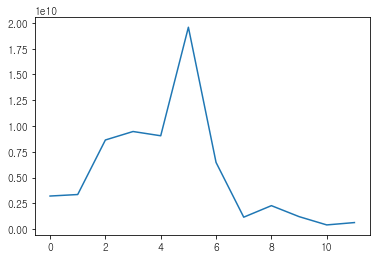

In [87]:
# 자전거 이동거리 단위는 (M) 입니다.
x = np.arange(12)

plt.plot(x, bicyleArray2020)
plt.show()

### 3-2. 서울지역 자가용 승용차와 자전거(따릉이) 이동거리

In [88]:
# 서울지역 자가용 승용차 연간 이동거리
carMileageYearSeoul

27269761.8

In [89]:
# 차량 연간 이동거리 단위는 km이고 자전거는 이동거리 단위는 m입니다.
# 차량과 자전거의 이동거리 비교
carMileageYearSeoul - (bicyleSum2020/1000)

-38243584.36976001

서울 지역은 연간 이동거리가 자전거가 더 많다는 것을 알 수 있습니다.

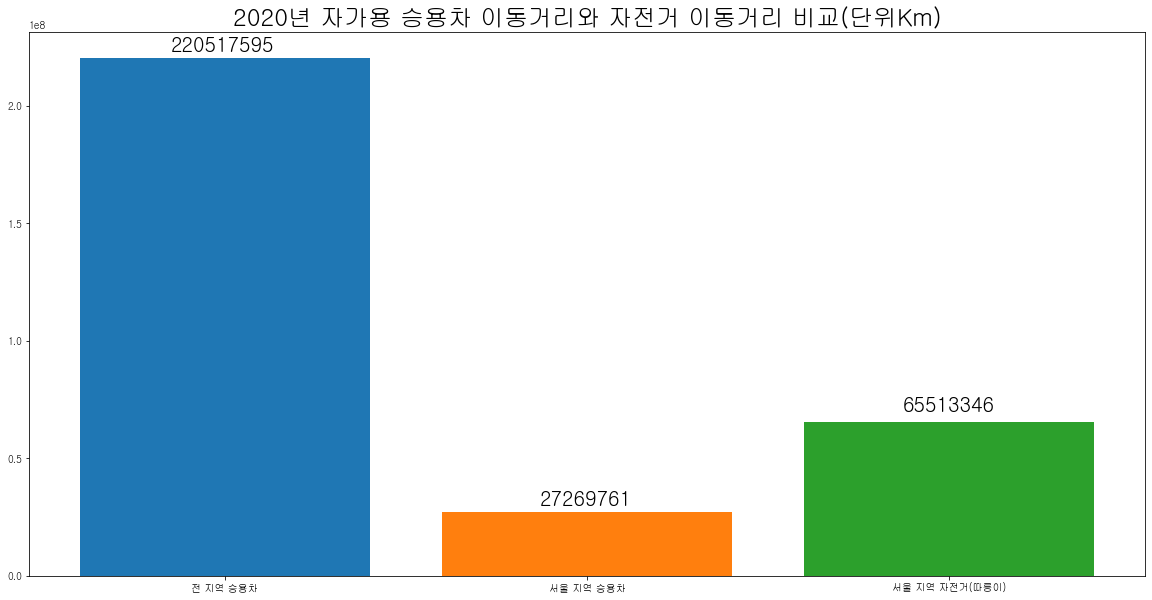

In [90]:
plt.figure(figsize=(20,10))
plt.bar("전 지역 승용차", int(carMileageYear))
plt.bar("서울 지역 승용차", int(carMileageYearSeoul))
plt.bar("서울 지역 자전거(따릉이)", int(bicyleSum2020/1000))
plt.rc('font', size="20")   
plt.text(-0.15, 223000000, int(carMileageYear))
plt.text(0.87, 30000000, int(carMileageYearSeoul))
plt.text(1.87, 70000000, int(bicyleSum2020/1000))

plt.title('2020년 자가용 승용차 이동거리와 자전거 이동거리 비교(단위Km)')
plt.show()

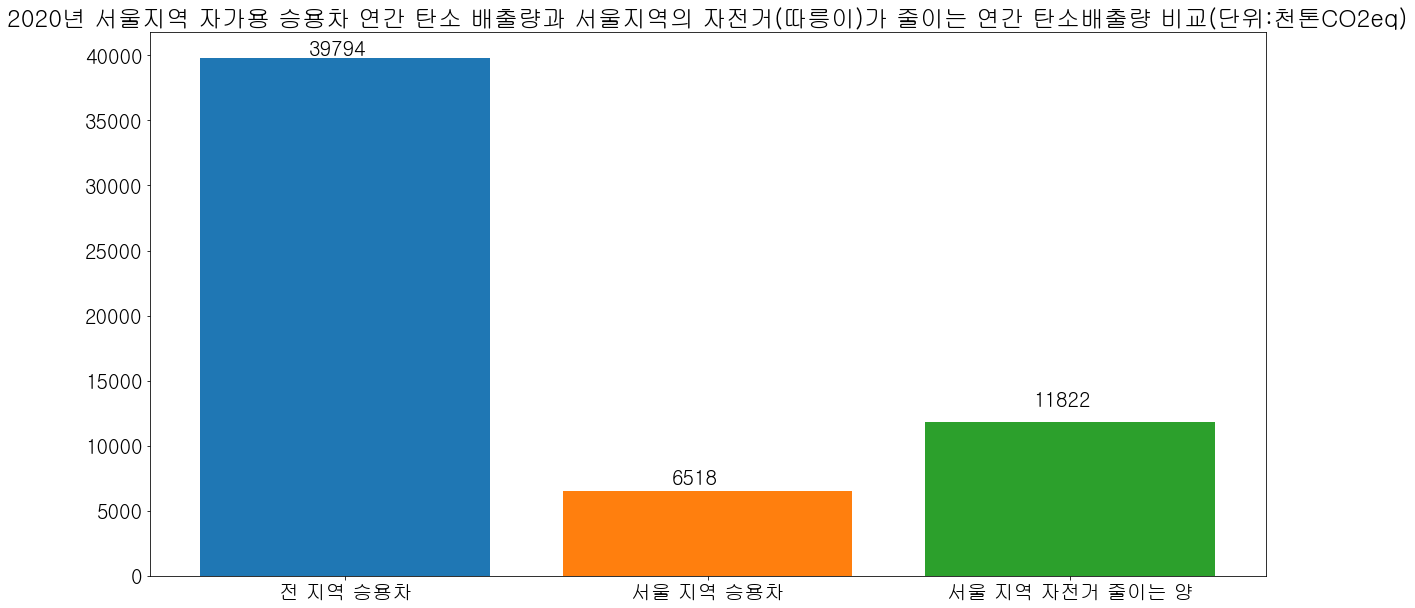

In [91]:
# 차종별도로부문 자가용 승용차 연간 탄소 배출량 (단위:천톤CO2eq)

# 자전거가 줄이는 탄소 배출량
reduceBicyleCarbonOutput = (carCarbonOutputYear[2020] / carMileageYear ) * (bicyleSum2020 / 1000)

plt.figure(figsize=(20,10))
plt.bar("전 지역 승용차", int(carCarbonOutputYear[2020]))
plt.bar("서울 지역 승용차", int(carCarbonOutputSeoul))
plt.bar("서울 지역 자전거 줄이는 양", int(reduceBicyleCarbonOutput))
plt.rc('font', size="20")
plt.text(-0.1, 40000, int(carCarbonOutputYear[2020]))
plt.text(0.9, 7000, int(carCarbonOutputSeoul))
plt.text(1.9, 13000, int(reduceBicyleCarbonOutput))


plt.title('2020년 서울지역 자가용 승용차 연간 탄소 배출량과 서울지역의 자전거(따릉이)가 줄이는 연간 탄소배출량 비교(단위:천톤CO2eq)')
plt.show()

## 데이터 결과


서울 지역에서 이동거리로만 보자면 자전거(따릉이)가 많은 기여를 하고 있습니다.

프로젝트 서비스 관련 부문

나라나 전세계로 보자면 아주 미미한 배출량을 줄이고 있을 것이지만, 도로부문에서 자전거를 이용하여 배출량을 줄이고 있다는 것을 볼 수 있습니다.
우리의 서비스는 자전거의 사용량을 더 늘려 탄소 배출량을 줄이고자 만든 것입니다.
이에 사용자의 사용량을 늘리기 위해 자전거를 이용했을 때, 탄소배출량을 얼마나 기여하는지 수치로 보여주면서 기여도 순위와 배출량을 많이 줄여주신 분에게 소소한 상품을 주어 재미와 흥미를 이끌수 있는 기획을 생각했습니다.
